In [3]:
import networkx as nx
import matplotlib.pyplot as plt


In [5]:
def unitary_cayley(f, R):
    """
    This function return the unitary Cayley graph on F_q[x]/f
    """
    
    n = f.degree()-1
    vertice = elements_quotient_ring = list(R.polynomials(max_degree=n))
    n = len(vertice)
    g=nx.empty_graph(n)
    for i in range(0,n):
        for j in range(0,n):
            if gcd(vertice[i]-vertice[j],f) ==1:
                g.add_edge(i,j)
    return g  

def gcd_cayley(f, R, D):
    """
    return the gcd graph G_f(D)
    """
    n = f.degree()-1
    vertice = elements_quotient_ring = list(R.polynomials(max_degree=n))
    n = len(vertice)
    g=nx.empty_graph(n)
    for i in range(0,n):
        for j in range(0,n):
            if (gcd(vertice[i]-vertice[j],f) in D) or (gcd(vertice[j]-vertice[i],f) in D):
                g.add_edge(i,j)
    return g 

def abstract_gcd_cayley(f, R, D):
    n = f.degree()-1
    vertice = elements_quotient_ring = list(R.polynomials(max_degree=n))
    n = len(vertice)
    g=nx.empty_graph(vertice)
    for i in vertice:
        for j in vertice:
            if gcd(i-j,f) in D:
                g.add_edge(i,j)
    return g 

def induced_graph(g,v):
    n = len(v)
    induced_g=nx.empty_graph(n)
    for i in range(n):
        for j in range(n):
            if v[j] in g.neighbors(v[i]):
                induced_g.add_edge(i,j)
    return induced_g 

def new_gcd(f,g):
    if f % g ==0:
        return 0
    else:
        return gcd(f,g)
   

# Some examples



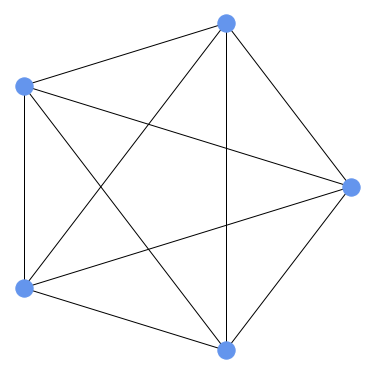

In [6]:
# The unitary Cayley graph on F_5[x]/x
F.<a> = GF(5)
R.<x> = PolynomialRing(F)
f = x
g = unitary_cayley(f,R)
fig = plt.gcf()
fig.set_size_inches(5,5)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = False,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')

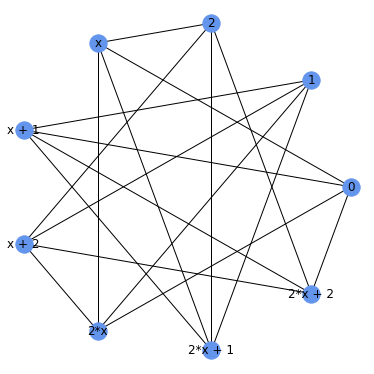

In [11]:
#The gcd graph G_f(D) over F_3[x] with f = x*(x+1) and D = {x, x+1}
F.<a> = GF(3)
R.<x> = PolynomialRing(F)
f = x*(x+1)
D = {x, x+1}
g = abstract_gcd_cayley(f,R, D)
fig = plt.gcf()
fig.set_size_inches(5,5)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')

# Find cycles in $G_f(D)$

[3*x + 1, 4*x^3 + 4*x^2 + 4*x + 4, 4*x^3 + 4*x^2 + 3*x + 4, 4*x^3 + 4*x^2 + 4*x, 0]


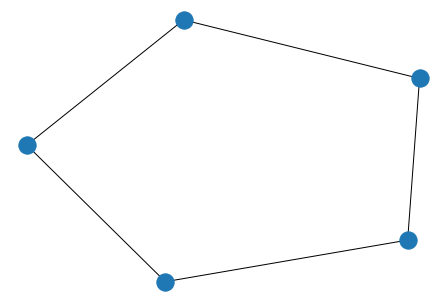

In [8]:
# Finding 5-cycle in G_f(D)

F.<a> = GF(5)
R.<x> = PolynomialRing(F)
f = x*(x+1)*(x+2)*(x+3)
D = {x, x+1, x+2, (x+3)}
g = gcd_cayley(f,R,D)
cycles = nx.cycle_basis(g)
result =[]
for cycle in cycles:
    if len(cycle) == 5:
        result.append(cycle)
        break
if result:
    cycle = result[0]
    n = f.degree()-1
    vertice = elements_quotient_ring = list(R.polynomials(max_degree=n))
    v = [vertice[item] for item in cycle]
    print(v)
else: 
    print("No 5-cycle")
cycle = result[0]
c = induced_graph(g,cycle)
nx.draw(c)    

[0, x^2 + x + 1, x^2 + 2, 2*x + 2, x^2, x^2 + x + 2, 2*x^2 + 2*x]
[(0, 0, 0), (1, 1, 0), (2, 0, 0), (2, 0, 1), (0, 1, 1), (2, 2, 1), (0, 0, 1)]
[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (0, 1)]


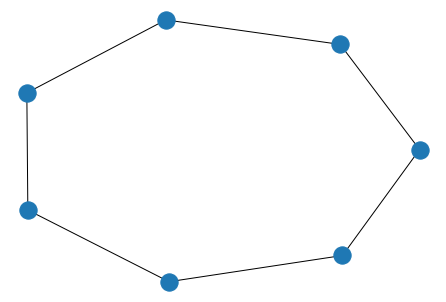

In [9]:
# Finding 7-cycle 
F.<a> = GF(3)
R.<x> = PolynomialRing(F)
pol_list = list(R.polynomials(max_degree=1))
monic_poly = [item for item in pol_list if item.is_monic()][1:]
h1 = monic_poly[0]
h2 = monic_poly[1]
h3 = monic_poly[2]
h4 = 1
f = h1*h2*h3*h4
f1 = h1*h2
f2= h3*h4
D = {f1, f2}
g = gcd_cayley(f,R,D)
cycles = nx.cycle_basis(g)
result =[]
for cycle in cycles:
    if len(cycle) == 7:
        result.append(cycle)
        break
if result:
    cycle = result[0]
    n = f.degree()-1
    vertice = elements_quotient_ring = list(R.polynomials(max_degree=n))
    v = [vertice[item]-vertice[cycle[0]] for item in cycle]
    print(v)
    cycle = result[0]
    c = induced_graph(g,cycle)
    nx.draw(c)  
    new_v = [(item %h1, item % h2, item % h3) for item in v]
    print(new_v)
    difference = [v[(i+1)%7]-v[i%7] for i in range(7)]
    connection = [(new_gcd (item,f1), new_gcd(item,f2)) for item in difference]
    print(connection)
else: 
    print("No 7-cycle")